In [75]:
from pathlib import Path
import os

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
nltk.download('stopwords')

import re
re1 = re.compile(r'  +')
import html
import unicodedata
import string 

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from collections import Counter
from nltk.util import ngrams

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
DATA_PATH=Path('./dat/')
DATA_PATH.mkdir(exist_ok=True)
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz 
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

In [23]:
import numpy as np
CLASSES = ['neg', 'pos']
PATH=Path('./dat/aclImdb/')

def get_texts(path):
    texts,labels = [],[]
    for idx,label in enumerate(CLASSES):
        for fname in (path/label).glob('*.*'):
            texts.append(fname.open('r', encoding='utf-8').read())
            labels.append(idx)
    return texts, labels

In [24]:
trn_texts, trn_labels = get_texts(PATH/'train')

In [25]:
len(trn_texts)

25000

In [27]:
trn_texts[:10]


["This was a nice attempt at something but it is too pretentious and boring to rise above it's low budget trappings. The use of virtual sets almost works but at some points it fails miserably. They made good use of the small budget I guess. I just wish the story and most of the acting was better. There are a lot of parts where you see what they were aiming for and it would of been great if they actually hit those marks but they don't. Confusing and unbelievable story. Bad DVD transfer too. It doesn't take much for me to watch a movie in one sitting. This I had to shut off. It was too boring. I can do slow movies. But just make them appealing in some aspect. Visually, story-wise, acting, etc. This was lacking in all departments so it never added up to an engrossing experience. Maybe the film maker's next attempt will be better.",
 '"Show me your boobies!" is not funny, and certainly not on a channel that shows cartoons if you understand where I\'m coming from. I don\'t want my 6 and 7 y

In [28]:
import random
trn_texts = random.sample(trn_texts, 20)

In [29]:
words = [word for text in trn_texts for word in text.split()]
len(words)

4712

In [35]:
with open(DATA_PATH/"outfile.txt", "w") as outfile:
    outfile.write("\n".join(trn_texts))

### Text preprocessing

In [39]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()


def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    return [word for word in words if word not in stop_words]

def lemmatize_words(words):
    """Lemmatize words in text"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
    return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    stop_words = stopwords.words('english')
    words = remove_stopwords(words, stop_words)
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [42]:
normalize_text(trn_texts[0])

'one really bad movie ive rack brain come one positive comment make act atrocious ive see believable performance cable access plot ridiculous steal diamond secret record president shark attack anything get near make cheesy fun worst night shark isnt even bad good dialogue sound deliver write second film top night shark worst soundtrack ive ever hear im surprise ear didnt start bleed techno synthesize sound someone actually bother record everything ive read italian film industry dead night shark like final nail coffin'

In [43]:
def normalize_corpus(corpus):
    return [normalize_text(t) for t in corpus]
trn_texts = normalize_corpus(trn_texts)

## WordCloud

In [45]:
comment_words = ''
comment_words += " ".join(trn_texts)+" "

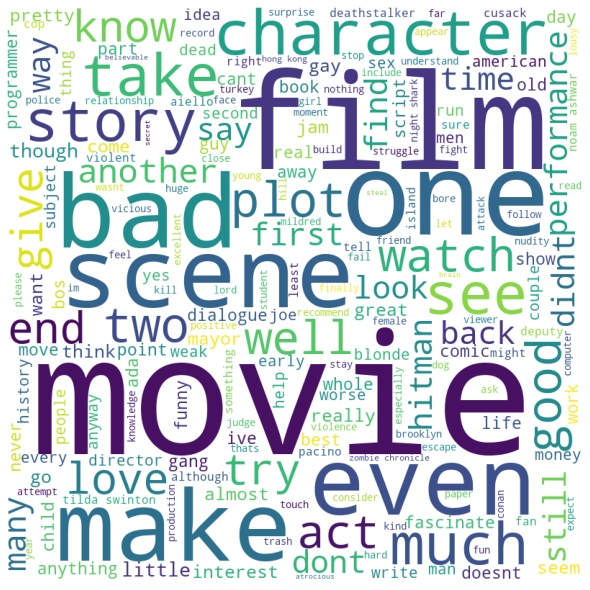

In [46]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Most frequent n_gram

In [49]:
words = [word for text in trn_texts for word in text.split()]

In [50]:
# list of all the unigrams
uni_grams = ngrams(words, 1)

In [51]:
# get the frequency of each unigram in our corpus
unigramFreq = Counter(uni_grams)
unigramFreq.most_common(20)

[(('movie',), 50),
 (('film',), 29),
 (('one',), 22),
 (('bad',), 16),
 (('make',), 15),
 (('scene',), 15),
 (('even',), 14),
 (('character',), 14),
 (('see',), 12),
 (('take',), 12),
 (('story',), 12),
 (('much',), 12),
 (('like',), 11),
 (('plot',), 10),
 (('get',), 10),
 (('good',), 10),
 (('also',), 10),
 (('two',), 10),
 (('act',), 9),
 (('watch',), 9)]

In [52]:
# list of all the biigrams
bi_grams = ngrams(words, 2)

In [53]:
# get the frequency of each bigram in our corpus
bigramFreq = Counter(bi_grams)
bigramFreq.most_common(20)

[(('tilda', 'swinton'), 4),
 (('night', 'shark'), 3),
 (('noam', 'ashwar'), 3),
 (('zombie', 'chronicle'), 3),
 (('hong', 'kong'), 3),
 (('jam', 'cahill'), 2),
 (('cahill', 'act'), 2),
 (('try', 'get'), 2),
 (('money', 'back'), 2),
 (('every', 'scene'), 2),
 (('gang', 'member'), 2),
 (('movie', 'like'), 2),
 (('american', 'film'), 2),
 (('subject', 'matter'), 2),
 (('two', 'men'), 2),
 (('touch', 'moment'), 2),
 (('two', 'gay'), 2),
 (('happen', 'two'), 2),
 (('whole', 'movie'), 2),
 (('one', 'thing'), 2)]

In [54]:
# list of all the trigrams
tri_grams = ngrams(words, 3)

In [55]:
# get the frequency of each unigram in our corpus
trigramFreq = Counter(tri_grams)
trigramFreq.most_common(20)

[(('jam', 'cahill', 'act'), 2),
 (('modern', 'day', 'programmer'), 2),
 (('second', 'renaissance', 'part'), 2),
 (('one', 'really', 'bad'), 1),
 (('really', 'bad', 'movie'), 1),
 (('bad', 'movie', 'ive'), 1),
 (('movie', 'ive', 'rack'), 1),
 (('ive', 'rack', 'brain'), 1),
 (('rack', 'brain', 'come'), 1),
 (('brain', 'come', 'one'), 1),
 (('come', 'one', 'positive'), 1),
 (('one', 'positive', 'comment'), 1),
 (('positive', 'comment', 'make'), 1),
 (('comment', 'make', 'act'), 1),
 (('make', 'act', 'atrocious'), 1),
 (('act', 'atrocious', 'ive'), 1),
 (('atrocious', 'ive', 'see'), 1),
 (('ive', 'see', 'believable'), 1),
 (('see', 'believable', 'performance'), 1),
 (('believable', 'performance', 'cable'), 1)]

## TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vocab_sz = 3000
vectorizer = TfidfVectorizer(max_features=vocab_sz)
# tokenize and build vocab
vectorizer.fit(trn_texts)
text_tf = vectorizer.transform(trn_texts)

In [57]:
text_tf

<20x1324 sparse matrix of type '<class 'numpy.float64'>'
	with 1974 stored elements in Compressed Sparse Row format>

In [58]:
print(text_tf[0].toarray().max())

0.41197003105361313


In [59]:
text_tf.shape

(20, 1324)

In [60]:
print(text_tf[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


## word-embedding

In [61]:
# iterate through each sentence in the file
data = []
for text in trn_texts:
    temp = []    
    # tokenize the sentence into words
    for j in text.split():
        temp.append(j)
  
    data.append(temp)

In [62]:
from gensim.models import Word2Vec
# train model uding CBOW by assigning sg=0
model = Word2Vec(data, min_count=1, size = 100, window = 5, sg = 0)
# summarize the loaded model
print(model)

Word2Vec(vocab=1327, size=100, alpha=0.025)


In [76]:
# access vector for one word
print(model['movie'])

[ 3.2400452e-03  2.5978568e-03  2.8277815e-03 -2.7640727e-03
 -3.5381317e-03 -3.4472414e-03  1.6341716e-03  7.4520014e-04
 -1.7491794e-03  2.8610416e-03  4.2279921e-03  2.8193367e-03
  3.6301422e-03  4.2265267e-03 -4.4774474e-03 -9.7960059e-04
  3.0410045e-03 -3.0498034e-03  4.9574841e-03  5.4243271e-04
 -3.7167636e-03  4.5168614e-03  1.7207852e-03  2.5115067e-03
 -1.1050666e-03  4.3367348e-03 -2.3243802e-03 -3.2013713e-03
 -4.8391419e-03  9.8784489e-04  4.0310938e-03  2.5059134e-03
  2.0686700e-03 -4.6297969e-04 -4.4763270e-03  2.9395646e-03
 -1.2545991e-03  1.4450818e-03 -4.4697444e-03  4.0142927e-03
  5.0599179e-03  4.2745555e-03  2.6291045e-03 -1.5357981e-03
 -2.5464527e-03  3.9933408e-03  2.0391326e-03  2.4612704e-03
  7.9446600e-04  5.6287047e-04 -3.9254096e-03  2.0162323e-03
 -2.8590747e-04  3.6397416e-03  2.8971743e-04  1.4920393e-03
 -1.5011171e-03 -2.6360780e-03 -2.3233956e-03 -1.4825579e-03
 -1.8704388e-03 -2.5598544e-03 -2.6299742e-03 -1.4531473e-03
 -4.2989370e-03  1.14233

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [65]:
from sklearn.decomposition import PCA
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


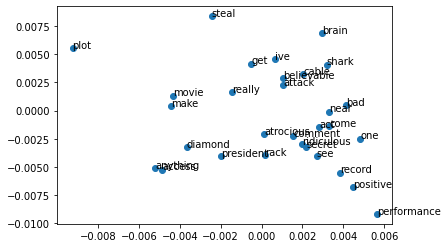

In [73]:
from matplotlib import pyplot
# create a scatter plot of the projection
pyplot.scatter(result[:30, 0], result[:30, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[:30]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## PoS tags

In [80]:
with open(DATA_PATH/"POS_tags.txt", "w") as outfile:
    for text in trn_texts[:10]:
        tagged = nltk.pos_tag(text.split())
        outfile.write(str(tagged) + "\n")
        print(tagged)

[('one', 'CD'), ('really', 'RB'), ('bad', 'JJ'), ('movie', 'NN'), ('ive', 'JJ'), ('rack', 'NN'), ('brain', 'NN'), ('come', 'VBP'), ('one', 'CD'), ('positive', 'JJ'), ('comment', 'NN'), ('make', 'VBP'), ('act', 'NN'), ('atrocious', 'JJ'), ('ive', 'JJ'), ('see', 'NN'), ('believable', 'JJ'), ('performance', 'NN'), ('cable', 'NN'), ('access', 'NN'), ('plot', 'NN'), ('ridiculous', 'JJ'), ('steal', 'JJ'), ('diamond', 'NN'), ('secret', 'JJ'), ('record', 'NN'), ('president', 'NN'), ('shark', 'JJ'), ('attack', 'NN'), ('anything', 'NN'), ('get', 'VBP'), ('near', 'IN'), ('make', 'VBP'), ('cheesy', 'NN'), ('fun', 'NN'), ('worst', 'JJS'), ('night', 'NN'), ('shark', 'NN'), ('isnt', 'VBD'), ('even', 'RB'), ('bad', 'JJ'), ('good', 'JJ'), ('dialogue', 'NN'), ('sound', 'NN'), ('deliver', 'IN'), ('write', 'JJ'), ('second', 'JJ'), ('film', 'NN'), ('top', 'JJ'), ('night', 'NN'), ('shark', 'NN'), ('worst', 'JJS'), ('soundtrack', 'NN'), ('ive', 'JJ'), ('ever', 'RB'), ('hear', 'VBP'), ('im', 'JJ'), ('surprise